In [3]:
import matplotlib.pyplot as plt
import numpy as np
from gamma_simulator import gamma_simulator

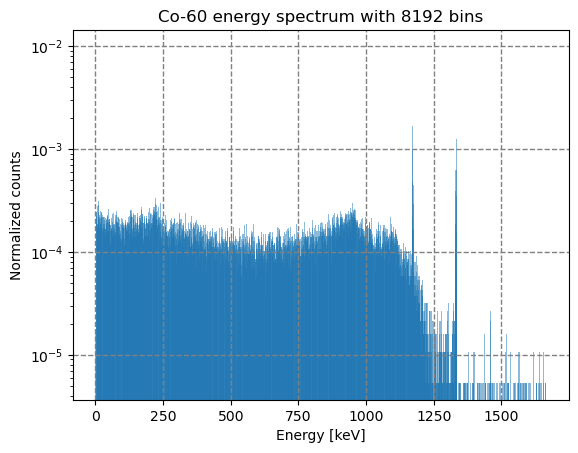

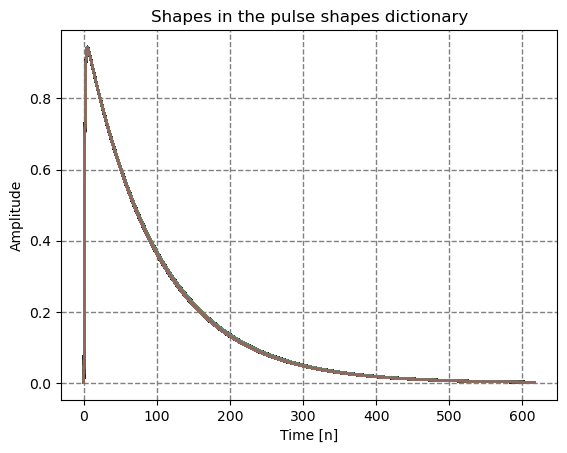

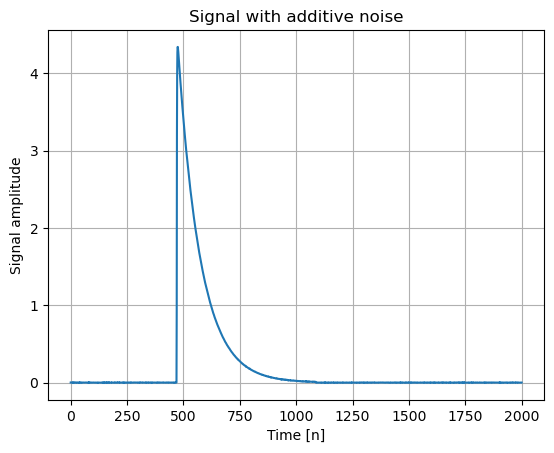

-- General information ------------------------------------------
Loaded spectrum for Co-60 isotope
Energy spectrum between 0.08 and 1665.23 keV with 8192 bins
Shapes are NOT allowed to exceed the signal boundaries
Sampling frequency: 10000000.0 samples per second
Signal length is 1 sec that are 10000000 samples
Events: 10236 (randomly generated)
Activity 10000.000 event per second and actual activity is 10236.000 events per second
Normalized lambda value: 1.000e-03 events per sample
Shape model: double_exponential
Number of double_exponential shapes in the dictionary: 10
Shape parameters: tau1 = 1e-07 sec ±1.000e-09 (1.00 samples) and tau2 = 1e-05 sec ±1.000e-07 (100.00 samples) 
Each shape has a maximum length of 6.180e-05 sec that are 618 samples
Rise time is 4.560e-07 sec and fall time is 6.134e-05 sec
Duty cycle is given by 0.62 with theoretical pile-up probability of 0.461
Actual pile-up probability is 0.470 with 5424 non-pile-up events out of 10236 events
Noise level: ±0.001 per

In [4]:
simulator = gamma_simulator(verbose=True,
                            verbose_plots=True,
                            energy_histogram='Co-60',
                            signal_len=1, # "analog" signal of 1 second that are 1e7 samples
                            fs=10e6,
                            lambda_value=1e4,
                            dict_shape_params={'tau1_mean': 1e-7,  # continuous-time parameters measured in seconds
                                         'tau1_std': 1e-9,
                                         'tau2_mean': 1e-5,
                                         'tau2_std': 1e-7},
                            noise_unit='std',
                            noise=1e-3,
                            dict_size=10,
                            seed=42)
s = simulator.generate_signal()

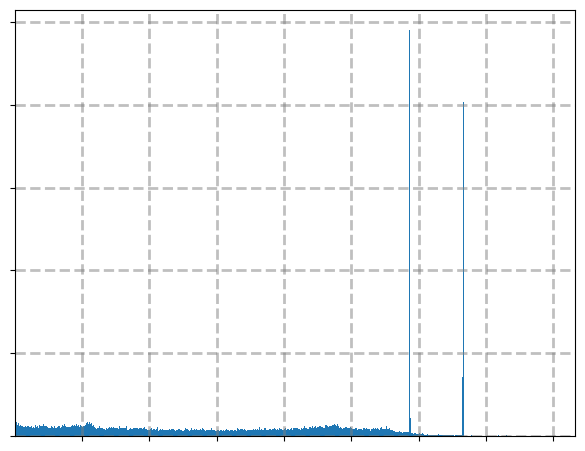

In [5]:
import matplotlib.pyplot as plt
plt.bar(simulator.hist_energy, simulator.hist_counts, width=2)
plt.tight_layout()
plt.xlim([np.min(simulator.hist_energy), np.max(simulator.hist_energy)])
plt.grid(linestyle='--', alpha=0.5, color='grey',linewidth=2)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig('Co-60_spectrum.jpeg', dpi=300)
plt.show()


In [6]:
# initialize object
simulator = gamma_simulator(energy_histogram='Co-60',
                            signal_len=1, # "analog" signal of 1 second that are 1e7 samples
                            fs=10e6,
                            lambda_value=1e4,
                            dict_shape_params={'tau1_mean': 1e-7,  # continuous-time parameters measured in seconds
                                         'tau1_std': 1e-9,
                                         'tau2_mean': 1e-5,
                                         'tau2_std': 1e-7},
                            noise_unit='std',
                            noise=1e-3,
                            dict_size=10,
                            seed=42)
# simulate 10 signals with the same parameters
# 1e8 samples in total
for _ in range(10):
    s = simulator.generate_signal()

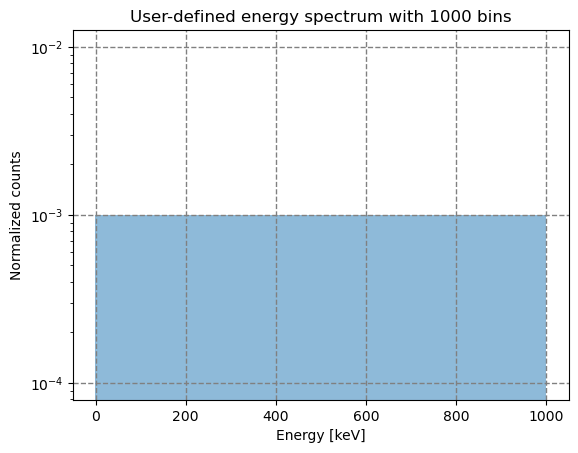

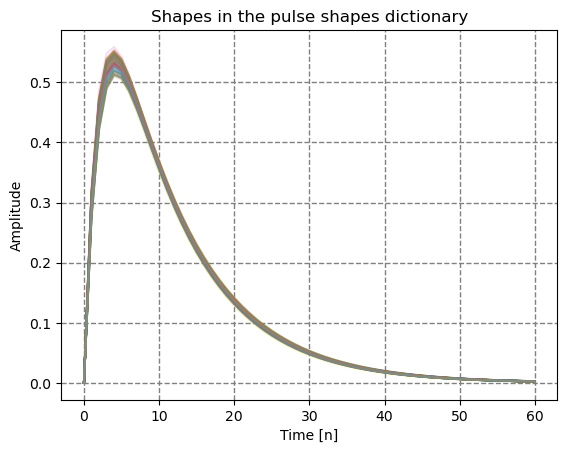

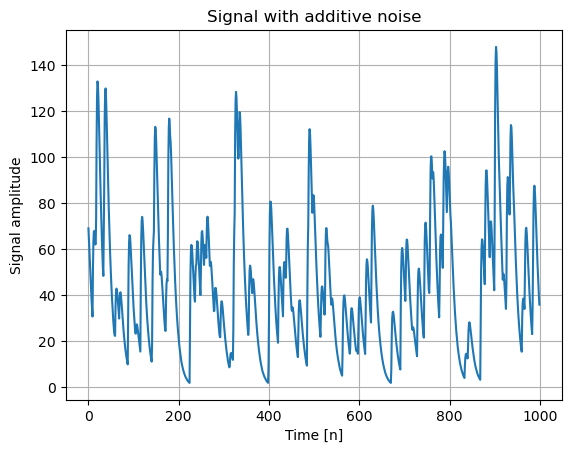

-- General information ------------------------------------------
Loaded spectrum from the dictionary
Energy spectrum between 0 and 999 keV with 1000 bins
Discrete-time parameters are used!
Signal length : 1000 samples
Number of events: 100 (randomly generated)
Activity 0.100 event per sample and actual activity is 0.100 events per sample
Shape model: double_exponential
Number of double_exponential shapes in the dictionary: 100
Shape parameters: tau1 = 2±0.1 and tau2 = 10±0.1
Each shape has a maximum length of 61.800 samples rounded to 61 samples
Rise time is 2.682 samples and fall time is 59.118 samples
Duty cycle is given by 6.18 with theoretical pile-up probability of 0.998
Actual pile-up probability is 0.990 with 1 non-pile-up events out of 100 events
Noise level: ±0.01 per sample
Measured SNR: 74.21 dB
Random seed is not defined


In [7]:
simulator = gamma_simulator(signal_len=1000,  # length of the signal
                            fs=1,             # discrete-time signal
                            lambda_value=0.1,
                            # arbitrary energy histogram
                            energy_histogram={'hist_energy': np.arange(0, 1000, 1),  # 
                                              'hist_counts': np.ones(1000)},
                            verbose=True,
                            verbose_plots=True,
                            enforce_edges=False,
                            dict_shape_params={'tau1_mean': 2,  # discrete-time parameters !!!
                                         'tau1_std': 0.1,
                                         'tau2_mean': 10,
                                         'tau2_std': 0.1})
s = simulator.generate_signal()

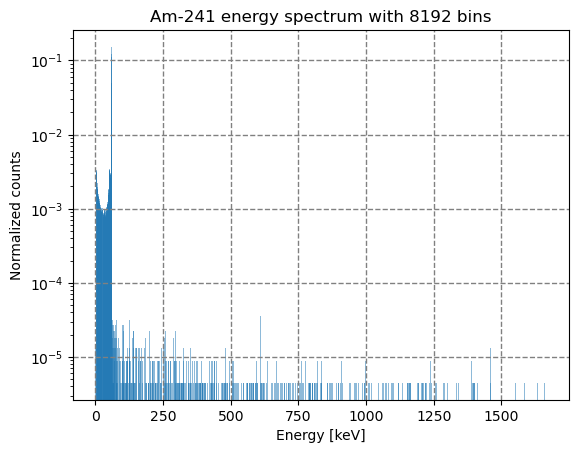

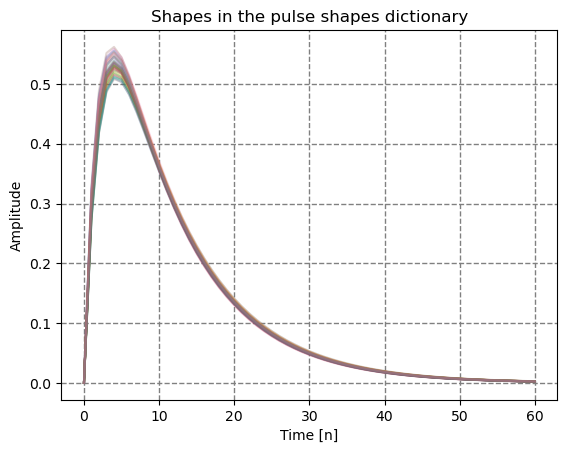

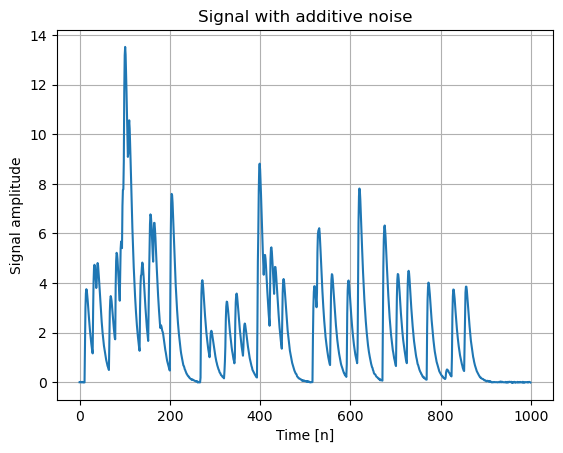

-- General information ------------------------------------------
Loaded spectrum for Am-241 isotope
Energy spectrum between 0.08 and 1665.23 keV with 8192 bins
Shapes are NOT allowed to exceed the signal boundaries
Discrete-time parameters are used!
Signal length : 1000 samples
Number of events: 48 (randomly generated)
Activity 0.050 event per sample and actual activity is 0.048 events per sample
Shape model: double_exponential
Number of double_exponential shapes in the dictionary: 100
Shape parameters: tau1 = 2±0.1 and tau2 = 10±0.1
Each shape has a maximum length of 61.800 samples rounded to 61 samples
Rise time is 2.682 samples and fall time is 59.118 samples
Duty cycle is given by 3.09 with theoretical pile-up probability of 0.954
Actual pile-up probability is 0.938 with 3 non-pile-up events out of 48 events
Noise level: ±0.01 per sample
Measured SNR: 49.83 dB
Random seed is not defined


In [8]:
simulator = gamma_simulator(signal_len=1000,  # length of the signal
                            fs=1,             # discrete-time signal
                            lambda_value=0.05,
                            energy_histogram='Am-241',
                            verbose=True,
                            verbose_plots=True,
                            enforce_edges=True,  # enforce the edges of the signal to be zero
                            dict_shape_params={'tau1_mean': 2,  # discrete-time parameters !!!
                                         'tau1_std': 0.1,
                                         'tau2_mean': 10,
                                         'tau2_std': 0.1})
s = simulator.generate_signal()

In [9]:
simulator = gamma_simulator(verbose=True,
                             signal_len=150,
                             fs=1,  # discrete-time signal !!! 
                             lambda_value=0.1,
                             dict_shape_params={'tau1_mean': 2,  # discrete-time parameters !!!
                                          'tau1_std': 0.001,
                                          'tau2_mean': 10,
                                          'tau2_std': 0.001},
                             noise_unit='snr', # noise unit is SNR
                             noise=40,
                             dict_size=10,
                             seed=None)
s = simulator.generate_signal()

-- General information ------------------------------------------
Loaded spectrum for Co-60 isotope
Energy spectrum between 0.08 and 1665.23 keV with 8192 bins
Shapes are NOT allowed to exceed the signal boundaries
Discrete-time parameters are used!
Signal length : 150 samples
Number of events: 9 (randomly generated)
Activity 0.100 event per sample and actual activity is 0.060 events per sample
Shape model: double_exponential
Number of double_exponential shapes in the dictionary: 10
Shape parameters: tau1 = 2±0.001 and tau2 = 10±0.001
Each shape has a maximum length of 60.018 samples rounded to 60 samples
Rise time is 2.682 samples and fall time is 57.336 samples
Duty cycle is given by 6.00 with theoretical pile-up probability of 0.998
Actual pile-up probability is 0.889 with 1 non-pile-up events out of 9 events
Noise level: 40 dB
Measured SNR: 39.29 dB
Random seed is not defined
